In [2]:
# imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd

# data cleaning

# arbeitslosenquote
arbeitslosenquote = pd.read_csv(
    "./original data/Arbeitslosenquote.csv", sep=";", decimal=","
)

cols_to_clean_dots = ["Bestand Arbeitslose", "Zugang Arbeitslose", "Abgang Arbeitslose"]
for col in cols_to_clean_dots:
    arbeitslosenquote[col] = (
        arbeitslosenquote[col]
        .astype(str)
        .str.replace(".", "", regex=False)
        .replace("", "0")
        .astype(int)
    )

arbeitslosenquote["Arbeitslosenquote"] = (
    arbeitslosenquote["Arbeitslosenquote"]
    .astype(str)
    .str.replace(",", ".", regex=False)
    .replace("", "0")
    .astype(float)
)

month_map = {
    "Januar": "01",
    "Februar": "02",
    "März": "03",
    "April": "04",
    "Mai": "05",
    "Juni": "06",
    "Juli": "07",
    "August": "08",
    "September": "09",
    "Oktober": "10",
    "November": "11",
    "Dezember": "12",
}

def convert_to_date(berichtsmonat_str):
    try:
        month_name, year_str = berichtsmonat_str.split(" ")
        month_num = month_map.get(month_name)
        return f"{year_str}-{month_num}-01"
    except Exception:
        return pd.NaT


arbeitslosenquote["DATE"] = (
    arbeitslosenquote["Berichtsmonat"].astype(str).apply(convert_to_date)
)
arbeitslosenquote["DATE"] = pd.to_datetime(arbeitslosenquote["DATE"], errors="coerce")
arbeitslosenquote["DATE"] = arbeitslosenquote["DATE"] + pd.offsets.MonthEnd(0)

arbeitslosenquote = arbeitslosenquote.drop(columns=["Berichtsmonat"])
cols_order = ["DATE"] + [col for col in arbeitslosenquote.columns if col != "DATE"]
arbeitslosenquote = arbeitslosenquote[cols_order]

# beschaeftigungsbarometer
beschaeftigungsbarometer = pd.read_csv("./original data/Beschäftigungsbarometer.csv")
beschaeftigungsbarometer["DATE"] = pd.to_datetime(beschaeftigungsbarometer["DATE"], errors="coerce") + pd.offsets.MonthEnd(0)
beschaeftigungsbarometer["DATE"] = beschaeftigungsbarometer["DATE"].dt.strftime("%Y-%m-%d")

# bmw absatzzahlen
bmw_absatzzahlen = pd.read_csv("./original data/BMW_Absatzzahlen.csv")
bmw_absatzzahlen["DATE"] = pd.to_datetime(bmw_absatzzahlen["DATE"], errors="coerce") + pd.offsets.MonthEnd(0)
bmw_absatzzahlen["DATE"] = bmw_absatzzahlen["DATE"].dt.strftime("%Y-%m-%d")

# bruttoinlandsprodukt
bruttoinlandsprodukt = pd.read_csv("./original data/Bruttoinlandsprodukt.csv", sep=";", decimal=",")
bruttoinlandsprodukt
# Remove specified columns
bruttoinlandsprodukt = bruttoinlandsprodukt.drop([
  "in jeweiligen Preisen, Mrd. EUR, saison- und kalenderbereinigte Werte nach X13 JDemetra+",
  "preisbereinigt, Kettenindex (2020=100), saison- und kalenderbereinigte Werte nach X13 JDemetra+"
], axis=1)

# Convert "Datum" to "DATE" in YYYY-MM-DD format
bruttoinlandsprodukt["DATE"] = pd.to_datetime(bruttoinlandsprodukt["Datum"], format="%d/%m/%Y").dt.strftime("%Y-%m-%d")
bruttoinlandsprodukt = bruttoinlandsprodukt.drop(columns=["Datum"])

# Reorder columns to have "DATE" first
cols = ["DATE"] + [col for col in bruttoinlandsprodukt.columns if col != "DATE"]
bruttoinlandsprodukt = bruttoinlandsprodukt[cols]
bruttoinlandsprodukt = bruttoinlandsprodukt.rename(columns={
  "in jeweiligen Preisen, Mrd. EUR, Originalwert": "BIP",
  "preisbereinigt, Kettenindex (2020=100), Originalwert": "BIP preisbereinigt"
})
bruttoinlandsprodukt

# euribor 1y
euribor_1y = pd.read_csv("./original data/Euribor_1Y.csv", sep=",", decimal=".")

# Convert DATE column to datetime (assuming format is YYYY-MM-DD)
euribor_1y["DATE"] = pd.to_datetime(euribor_1y["DATE"], format="%Y-%m-%d", errors="coerce")
euribor_1y["DATE"] = euribor_1y["DATE"] + pd.offsets.MonthEnd(0)
euribor_1y["DATE"] = euribor_1y["DATE"].dt.strftime("%Y-%m-%d")

euribor_1y = euribor_1y.rename(
    columns={
        "Euribor 1-year - Historical close, average of observations through period (FM.M.U2.EUR.RT.MM.EURIBOR1YD_.HSTA)": "Euribor 1Y"
    }
)
euribor_1y = euribor_1y.drop(columns=["TIME PERIOD"])

euribor_3m = pd.read_csv("./original data/Euribor_3M.csv", sep=",", decimal=".")
# Convert DATE column to datetime (assuming format is YYYY-MM-DD)
euribor_3m["DATE"] = pd.to_datetime(euribor_3m["DATE"], format="%Y-%m-%d", errors="coerce")
euribor_3m["DATE"] = euribor_3m["DATE"] + pd.offsets.MonthEnd(0)
euribor_3m["DATE"] = euribor_3m["DATE"].dt.strftime("%Y-%m-%d")
euribor_3m = euribor_3m.rename(
    columns={
        "Euribor 3-month - Historical close, average of observations through period (FM.M.U2.EUR.RT.MM.EURIBOR3MD_.HSTA)": "Euribor 3M"
    }
)
euribor_3m = euribor_3m.drop(columns=["TIME PERIOD"])

euribor_6m = pd.read_csv("./original data/Euribor_6M.csv", sep=",", decimal=".")
# Convert DATE column to datetime (assuming format is YYYY-MM-DD)
euribor_6m["DATE"] = pd.to_datetime(euribor_6m["DATE"], format="%Y-%m-%d", errors="coerce")
euribor_6m["DATE"] = euribor_6m["DATE"] + pd.offsets.MonthEnd(0)
euribor_6m["DATE"] = euribor_6m["DATE"].dt.strftime("%Y-%m-%d")
euribor_6m = euribor_6m.rename(
    columns={
        "Euribor 6-month - Historical close, average of observations through period (FM.M.U2.EUR.RT.MM.EURIBOR6MD_.HSTA)": "Euribor 6M"
    }
)
euribor_6m = euribor_6m.drop(columns=["TIME PERIOD"])

gebrauchtwagenpreisindex = pd.read_csv("./original data/Gebrauchtwagenpreisindex.csv")


,DATE,Euribor 6M
0,1994-01-31,6.6700
1,1994-02-28,6.6800
2,1994-03-31,6.6500
3,1994-04-30,6.5100
4,1994-05-31,6.2100
...,...,...
371,2024-12-31,2.6303
372,2025-01-31,2.6121
373,2025-02-28,2.4596
374,2025-03-31,2.3854


In [10]:
# descriptive statistics
df = pd.read_csv('Data/monthly/data.csv')
df.columns = df.columns.str.strip()  # Strip whitespace from column names


df_ds = df.describe()
df_ds = df_ds.transpose()
df_ds

,count,mean,std,min,25%,50%,75%,max
Absatzzahlen,60.0,1.671455e+04,2894.585199,1.034600e+04,1.453700e+04,1.644050e+04,1.925550e+04,2.293700e+04
BMW Finanzierung,60.0,5.949000e+01,9.782182,4.240000e+01,5.193750e+01,5.892500e+01,6.610000e+01,8.400000e+01
BMW Leasing,60.0,6.279250e+01,11.141748,4.125000e+01,5.395000e+01,6.200000e+01,7.176250e+01,8.600000e+01
Auto Finanzierung,60.0,6.728833e+01,12.040329,4.000000e+01,5.962500e+01,6.550000e+01,7.670000e+01,9.375000e+01
Auto Leasing,60.0,4.812000e+01,8.392653,2.720000e+01,4.525000e+01,4.735000e+01,5.262500e+01,7.600000e+01
Gebrauchtwagenindex,60.0,1.418933e+02,15.463855,1.147000e+02,1.297500e+02,1.401500e+02,1.510000e+02,1.716000e+02
EURIBOR 3M,60.0,1.273870e+00,1.930329,-5.820000e-01,-5.235500e-01,-1.013000e-01,3.459250e+00,3.971600e+00
Geschäftsklima,60.0,9.050833e+01,5.249448,7.500000e+01,8.660000e+01,8.965000e+01,9.320000e+01,1.010000e+02
Geschäftslage,60.0,9.224667e+01,5.730485,7.860000e+01,8.827500e+01,9.310000e+01,9.722500e+01,1.017000e+02
Geschäftserwartungen,60.0,8.895500e+01,6.799263,7.100000e+01,8.435000e+01,8.740000e+01,9.460000e+01,1.022000e+02


In [ ]:
# seasonal adjustment
# data by IFO-Institut already seasonally adjusted

from statsmodels.tsa.seasonal import STL

# List of columns to be seasonally adjusted
seasonal_cols = [
  'Absatzzahlen', 'BMW Finanzierung', 'BMW Leasing', 'Auto Finanzierung', 'Auto Leasing',
   'Verbraucherpreisindex',
  'Arbeitslosenquote', 'Bestand Arbeitslose', 'Zugang Arbeitslose', 'Abgang Arbeitslose'
]

df_sa = df.copy()
df_sa['DATE'] = pd.to_datetime(df_sa['DATE'])
df_sa = df_sa.set_index('DATE')

for col in seasonal_cols:
  stl = STL(df_sa[col], period=12, robust=True)
  res = stl.fit()
  df_sa[col] = res.trend + res.resid  # seasonally adjusted

df_sa = df_sa.reset_index()

df_sa

,DATE,Absatzzahlen,BMW Finanzierung,BMW Leasing,Auto Finanzierung,Auto Leasing,Gebrauchtwagenindex,EURIBOR 3M,Geschäftsklima,Geschäftslage,...,Zugang Arbeitslose,Abgang Arbeitslose,tavg,tmin,tmax,prcp,wdir,wspd,wpgt,pres
0,2020-01-31,20197.056055,67.643871,81.596561,61.358966,34.170965,118.6,-0.3911,96.0,99.6,...,568735.099659,524308.088261,4.561290,-2.7,13.4,49.0,229.774194,15.341935,59.3,1021.090323
1,2020-02-29,19996.253807,63.831304,79.003916,63.371881,37.399108,119.5,-0.4089,95.9,99.0,...,585792.895041,517012.825158,6.282759,0.8,14.4,89.2,241.896552,19.841379,77.8,1009.951724
2,2020-03-31,20037.985951,62.868894,46.441574,59.629593,34.745923,119.4,-0.4166,86.2,92.9,...,587399.801317,509569.133724,5.719355,-4.0,16.8,47.6,206.096774,15.345161,79.6,1017.764516
3,2020-04-30,19640.703601,66.051952,77.737069,60.229097,34.903892,116.1,-0.2541,75.0,79.3,...,583905.870812,498685.856264,10.700000,-2.0,23.0,7.7,202.033333,13.520000,50.0,1018.456667
4,2020-05-31,8489.754848,62.523694,79.622751,61.569152,38.912760,114.7,-0.2720,79.5,78.6,...,542199.566571,495945.915068,12.293548,0.6,24.1,26.9,233.838710,13.419355,46.3,1019.329032
5,2020-06-30,19631.433705,63.658155,76.838510,59.269915,39.968844,116.0,-0.3760,85.4,80.9,...,519170.664768,494023.972901,18.760000,9.0,29.8,53.3,168.500000,12.653333,50.0,1012.686667
6,2020-07-31,19515.601434,58.670709,76.381685,59.419881,40.761096,120.5,-0.4441,89.4,84.3,...,511641.028724,495479.334094,17.987097,9.8,28.3,46.7,252.322581,12.058065,59.3,1015.345161
7,2020-08-31,18811.107759,60.028149,74.502541,57.644269,39.915919,124.1,-0.4797,92.1,87.7,...,510236.995637,492419.706227,21.154839,11.4,34.6,37.5,180.709677,11.896774,66.7,1013.280645
8,2020-09-30,19636.144051,59.873327,74.045313,59.607731,42.043805,126.4,-0.4914,93.5,89.5,...,496382.109076,477452.326103,15.420000,5.9,30.3,44.8,204.166667,10.916667,50.0,1016.486667
9,2020-10-31,19115.791937,61.490814,73.356609,55.226831,42.835956,127.2,-0.5091,93.0,90.5,...,519446.174981,498991.402665,11.112903,3.8,21.7,70.0,191.129032,13.651613,53.7,1011.454839


In [44]:
# feature engineering
df_fe = df_sa.copy()
df_fe["DATE"] = pd.to_datetime(df_fe["DATE"])

# Create lagged features
absatz_idx = df_fe.columns.get_loc('Absatzzahlen')
for lag in range(1, 18):
  col_name = f'Absatzzahlen_t{lag}'
  df_fe.insert(absatz_idx + lag, col_name, df_fe['Absatzzahlen'].shift(lag))

#  Create growth rate features
for col in seasonal_cols:
  if col != 'Absatzzahlen':
    df_fe[f'{col}_growth'] = df_fe[col].pct_change()
df_fe

,DATE,Absatzzahlen,Absatzzahlen_t1,Absatzzahlen_t2,Absatzzahlen_t3,Absatzzahlen_t4,Absatzzahlen_t5,Absatzzahlen_t6,Absatzzahlen_t7,Absatzzahlen_t8,...,pres,BMW Finanzierung_growth,BMW Leasing_growth,Auto Finanzierung_growth,Auto Leasing_growth,Verbraucherpreisindex_growth,Arbeitslosenquote_growth,Bestand Arbeitslose_growth,Zugang Arbeitslose_growth,Abgang Arbeitslose_growth
0,2020-01-31,20197.056055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1021.090323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-29,19996.253807,20197.056055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1009.951724,-0.056362,-0.031774,0.032806,0.094470,0.003290,-0.002839,-0.061909,0.029993,-0.013914
2,2020-03-31,20037.985951,19996.253807,20197.056055,NaN,NaN,NaN,NaN,NaN,NaN,...,1017.764516,-0.015077,-0.412161,-0.059053,-0.070942,0.003280,-0.002979,-0.000649,0.002743,-0.014397
3,2020-04-30,19640.703601,20037.985951,19996.253807,20197.056055,NaN,NaN,NaN,NaN,NaN,...,1018.456667,0.050630,0.673868,0.010054,0.004546,0.003631,-0.004791,0.062726,-0.005948,-0.021358
4,2020-05-31,8489.754848,19640.703601,20037.985951,19996.253807,20197.056055,NaN,NaN,NaN,NaN,...,1019.329032,-0.053416,0.024257,0.022249,0.114854,0.002746,-0.003216,-0.015824,-0.071426,-0.005494
5,2020-06-30,19631.433705,8489.754848,19640.703601,20037.985951,19996.253807,20197.056055,NaN,NaN,NaN,...,1012.686667,0.018144,-0.034968,-0.037344,0.027140,0.003846,0.001598,0.010625,-0.042473,-0.003875
6,2020-07-31,19515.601434,19631.433705,8489.754848,19640.703601,20037.985951,19996.253807,20197.056055,NaN,NaN,...,1015.345161,-0.078347,-0.005945,0.002530,0.019822,0.002695,-0.009357,0.004367,-0.014503,0.002946
7,2020-08-31,18811.107759,19515.601434,19631.433705,8489.754848,19640.703601,20037.985951,19996.253807,20197.056055,NaN,...,1013.280645,0.023137,-0.024602,-0.029882,-0.020735,0.002997,-0.003959,-0.014493,-0.002744,-0.006175
8,2020-09-30,19636.144051,18811.107759,19515.601434,19631.433705,8489.754848,19640.703601,20037.985951,19996.253807,20197.056055,...,1016.486667,-0.002579,-0.006137,0.034062,0.053309,0.004277,-0.004176,-0.005390,-0.027154,-0.030396
9,2020-10-31,19115.791937,19636.144051,18811.107759,19515.601434,19631.433705,8489.754848,19640.703601,20037.985951,19996.253807,...,1011.454839,0.027015,-0.009301,-0.073496,0.018841,0.002752,-0.004450,-0.004374,0.046464,0.045113


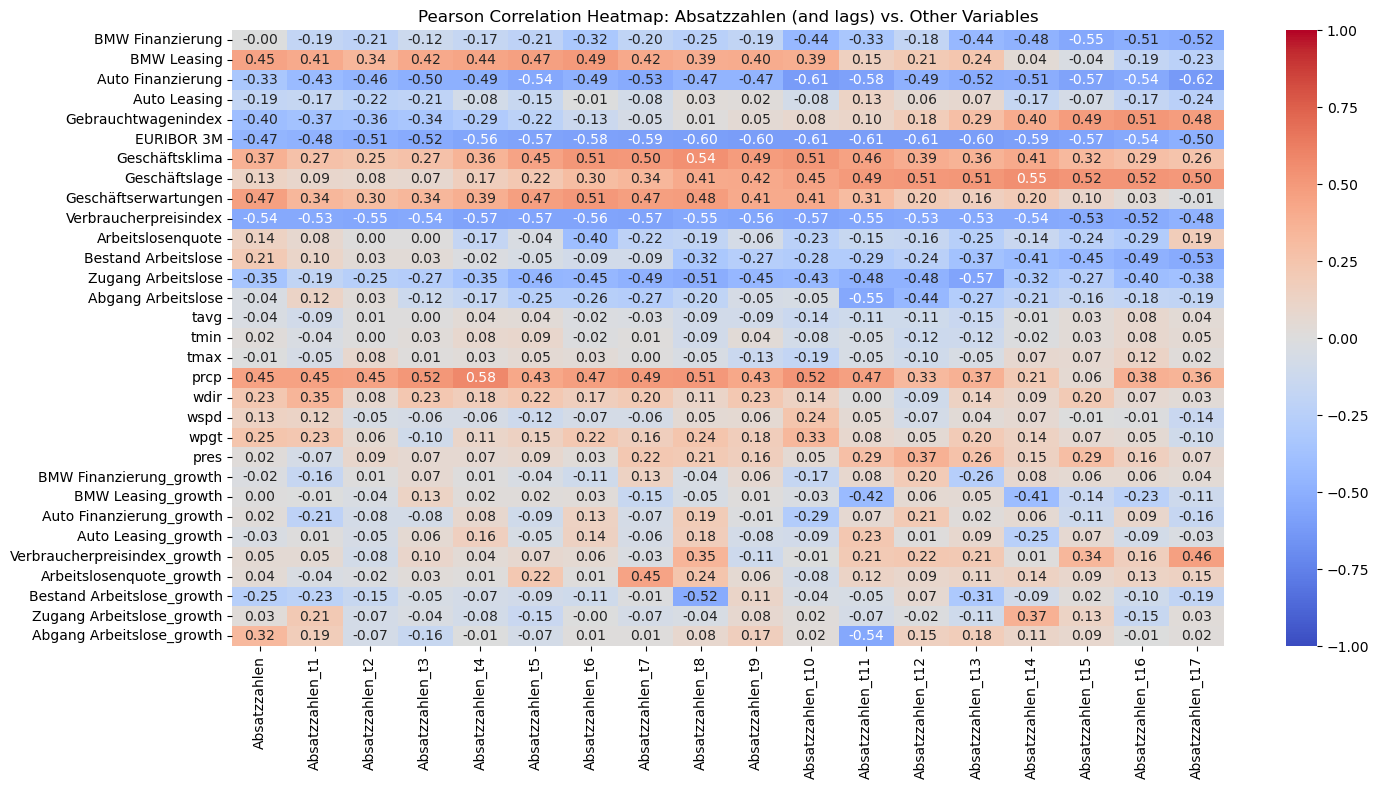


Pearson Correlation Subset:


,Absatzzahlen,Absatzzahlen_t1,Absatzzahlen_t2,Absatzzahlen_t3,Absatzzahlen_t4,Absatzzahlen_t5,Absatzzahlen_t6,Absatzzahlen_t7,Absatzzahlen_t8,Absatzzahlen_t9,Absatzzahlen_t10,Absatzzahlen_t11,Absatzzahlen_t12,Absatzzahlen_t13,Absatzzahlen_t14,Absatzzahlen_t15,Absatzzahlen_t16,Absatzzahlen_t17
BMW Finanzierung,-0.004718,-0.187384,-0.211954,-0.123330,-0.171410,-0.214709,-0.320964,-0.201443,-0.248883,-0.190640,-0.441404,-0.328216,-0.181449,-0.441835,-0.478761,-0.545430,-0.506676,-0.515732
BMW Leasing,0.448351,0.412274,0.342158,0.419217,0.440918,0.467339,0.494090,0.417480,0.391267,0.402448,0.389164,0.149323,0.207324,0.239349,0.040348,-0.037733,-0.185604,-0.229319
Auto Finanzierung,-0.328161,-0.428761,-0.461668,-0.495703,-0.492571,-0.542120,-0.488031,-0.529547,-0.472199,-0.474067,-0.614989,-0.578410,-0.490984,-0.521090,-0.512351,-0.574756,-0.538247,-0.621697
Auto Leasing,-0.185454,-0.171389,-0.224752,-0.209476,-0.082277,-0.149616,-0.006611,-0.083698,0.028543,0.016411,-0.084587,0.131199,0.057759,0.071013,-0.166692,-0.069828,-0.174304,-0.237816
Gebrauchtwagenindex,-0.404541,-0.373642,-0.363521,-0.343602,-0.289240,-0.219281,-0.131184,-0.054862,0.013818,0.049140,0.081842,0.102384,0.180729,0.288579,0.399802,0.485546,0.514507,0.479925
EURIBOR 3M,-0.465505,-0.484119,-0.507739,-0.523940,-0.559164,-0.570984,-0.580649,-0.589171,-0.595641,-0.601882,-0.606759,-0.608420,-0.607650,-0.603025,-0.589646,-0.569169,-0.538972,-0.495853
Geschäftsklima,0.373474,0.271201,0.246393,0.266992,0.355238,0.448394,0.514514,0.503346,0.544547,0.491512,0.508817,0.456848,0.391646,0.361356,0.406361,0.324607,0.287269,0.257600
Geschäftslage,0.125182,0.088151,0.079803,0.074707,0.167846,0.223284,0.301924,0.336521,0.411821,0.416597,0.453036,0.493045,0.505977,0.513547,0.547471,0.518301,0.523437,0.502368
Geschäftserwartungen,0.466845,0.337561,0.302974,0.340386,0.388813,0.470412,0.506107,0.471332,0.483397,0.407891,0.406800,0.308668,0.202851,0.158598,0.199982,0.099471,0.034315,-0.009327
Verbraucherpreisindex,-0.537990,-0.534808,-0.548751,-0.538089,-0.570383,-0.567789,-0.563987,-0.572871,-0.545958,-0.558793,-0.566069,-0.549454,-0.533584,-0.532964,-0.538710,-0.529746,-0.521290,-0.480846


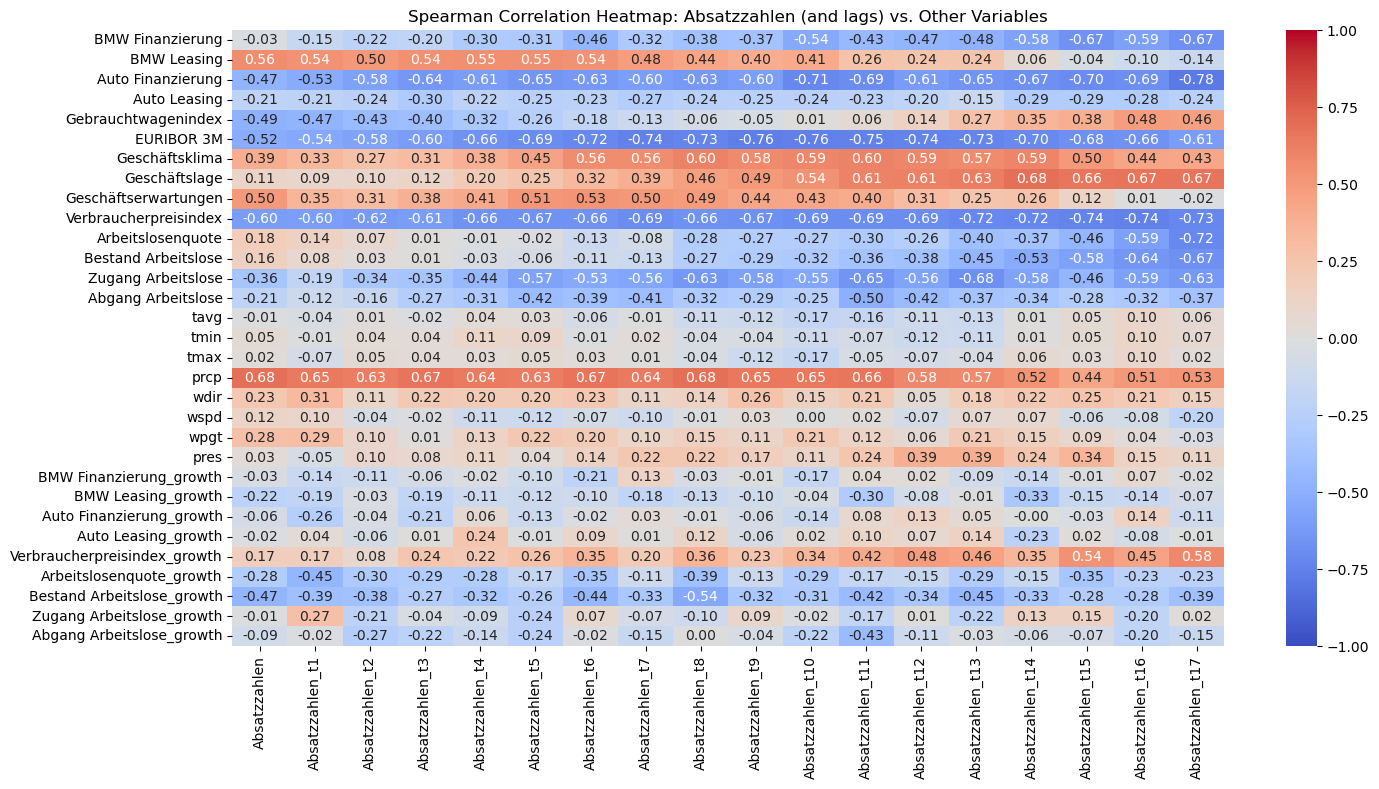


Spearman Correlation Subset:


,Absatzzahlen,Absatzzahlen_t1,Absatzzahlen_t2,Absatzzahlen_t3,Absatzzahlen_t4,Absatzzahlen_t5,Absatzzahlen_t6,Absatzzahlen_t7,Absatzzahlen_t8,Absatzzahlen_t9,Absatzzahlen_t10,Absatzzahlen_t11,Absatzzahlen_t12,Absatzzahlen_t13,Absatzzahlen_t14,Absatzzahlen_t15,Absatzzahlen_t16,Absatzzahlen_t17
BMW Finanzierung,-0.026507,-0.151899,-0.220031,-0.199767,-0.298223,-0.310678,-0.459348,-0.317852,-0.379493,-0.367421,-0.537191,-0.432143,-0.465805,-0.479070,-0.577675,-0.666008,-0.593658,-0.672455
BMW Leasing,0.555432,0.538282,0.504876,0.543039,0.552563,0.553030,0.537488,0.477262,0.441731,0.396561,0.409748,0.262857,0.242293,0.243640,0.060993,-0.041238,-0.096688,-0.135760
Auto Finanzierung,-0.470575,-0.525248,-0.582762,-0.636635,-0.607587,-0.647908,-0.629579,-0.597162,-0.631264,-0.597014,-0.714862,-0.690204,-0.612571,-0.649630,-0.672895,-0.697892,-0.686117,-0.782392
Auto Leasing,-0.205946,-0.214845,-0.237257,-0.303150,-0.218660,-0.247835,-0.234153,-0.270198,-0.244600,-0.247421,-0.240528,-0.233163,-0.201693,-0.147317,-0.285230,-0.286957,-0.281184,-0.244941
Gebrauchtwagenindex,-0.492053,-0.471974,-0.426400,-0.403902,-0.320323,-0.256656,-0.182861,-0.131038,-0.063268,-0.053761,0.011478,0.061537,0.136576,0.267376,0.351015,0.384240,0.477164,0.463978
EURIBOR 3M,-0.519255,-0.544185,-0.575318,-0.602670,-0.658920,-0.688167,-0.718391,-0.743509,-0.729958,-0.758281,-0.755390,-0.746531,-0.735779,-0.731614,-0.704841,-0.677075,-0.656660,-0.608275
Geschäftsklima,0.391901,0.325320,0.267372,0.306822,0.382600,0.452503,0.559578,0.559326,0.602126,0.577254,0.591182,0.601602,0.591965,0.569801,0.593918,0.498287,0.441194,0.432839
Geschäftslage,0.112429,0.091065,0.101147,0.116387,0.200424,0.248322,0.322190,0.385171,0.464011,0.494434,0.536570,0.607511,0.610954,0.630045,0.684697,0.662999,0.667935,0.666944
Geschäftserwartungen,0.499750,0.346309,0.306698,0.379880,0.414854,0.514277,0.531039,0.502490,0.489957,0.439170,0.429707,0.398857,0.311955,0.250600,0.259167,0.123003,0.005709,-0.022579
Verbraucherpreisindex,-0.603779,-0.599708,-0.617829,-0.608115,-0.663021,-0.670707,-0.663732,-0.688679,-0.658328,-0.672579,-0.693349,-0.691735,-0.688884,-0.716119,-0.724206,-0.741502,-0.743058,-0.726367


In [45]:
# modeling

# correlation
# Define target columns (Absatzzahlen and its lags)
target_cols = ['Absatzzahlen'] + [f'Absatzzahlen_t{i}' for i in range(1, 18)]

# Define other columns (all columns except DATE and target_cols)
other_cols = [col for col in df_fe.columns if col not in target_cols + ['DATE']]

correlation_methods = ['pearson', 'spearman']

for method in correlation_methods:
    # Calculate the correlation matrix between target_cols and other_cols
    correlation_matrix = df_fe[target_cols + other_cols].corr(method=method)

    # Select the relevant part of the correlation matrix
    # This shows the correlation of each 'other_col' with each 'target_col'
    correlation_subset = correlation_matrix.loc[other_cols, target_cols]

    # Plot the heatmap
    plt.figure(figsize=(16, 8))
    sns.heatmap(correlation_subset, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
    plt.title(f'{method.capitalize()} Correlation Heatmap: Absatzzahlen (and lags) vs. Other Variables')
    plt.show()

    print(f"\n{method.capitalize()} Correlation Subset:")
    display(correlation_subset)

In [ ]:
# indexing
df_sa["DATE"] = pd.to_datetime(df_sa["DATE"])
df_sa = df_sa.set_index("DATE")

columns_to_index = [
    "Absatzzahlen",
    "BMW Finanzierung",
    "BMW Leasing",
    "Auto Finanzierung",
    "Auto Leasing",
    "Gebrauchtwagenindex",
    "Geschäftsklima",
    "Geschäftslage",
    "Geschäftserwartungen",
    "Verbraucherpreisindex",
    "Arbeitslosenquote",
    "Bestand Arbeitslose",
    "Zugang Arbeitslose",
    "Abgang Arbeitslose",
]

In [ ]:
# plotting

In [ ]:
# multiple linear regression analysis

In [ ]:
# regression model